# Customers Churn Prediction Project

# Introduction

The customers of the bank are leaving: little by little, chipping away every month. In this project, we need to predict whether a customer will leave the bank soon or not. We will build a model with the maximum possible F1 score - at least 0.59, and also measure the AUC-ROC metric.

### Step 1: Download and prepare the data. Explain the procedure

In [1]:
import pandas as pd
import sidetable as stb
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Let's download the data and examine it. 

In [2]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


We have 14 columns, 3 object type,s and 11 numerical. 
Let's go further. 

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


So here we see the first thing that we will change - let's make all the features' names and their value lowercase. 

In [5]:
data.columns = data.columns.str.lower()
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Great!

The features' names are fixed. Let's move on to the values.

In [6]:
for i in range(len(data.columns)):
    feature = data.dtypes.index[i]
    if data.dtypes[i] == 'O':
        data[feature] = data[feature].str.lower()

In [7]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


Excellent!

The whole data frame is lowercased!

The dataset contains the feature **'rownumber'** - this is a sort of index column, which doesn't contribute any information about the target variable. Also, there is the **customerid** feature which is also a kind of index column for the customers. The **surname** column also doesn't contain any information that can help our model - it's not really a feature, it's also an index in the 'real-world' to distinguish people one from each other.  So, let's remove them all because it's not necessary for our model building.

In [8]:
data.drop(['rownumber', 'customerid', 'surname'], axis = 1, inplace = True)

In [9]:
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


Sweet!

Let's move forward.

Let's check if there are missing values in the data set.

**Missing values**

In [10]:
data.stb.missing(style = True)

,missing,total,percent
tenure,909,"10,000",9.09%
creditscore,0,"10,000",0.00%
geography,0,"10,000",0.00%
gender,0,"10,000",0.00%
age,0,"10,000",0.00%
balance,0,"10,000",0.00%
numofproducts,0,"10,000",0.00%
hascrcard,0,"10,000",0.00%
isactivemember,0,"10,000",0.00%
estimatedsalary,0,"10,000",0.00%


We see that only one feature has missing values - the **'tenure'** feature. The missing values are only 9% from the whole dataset, which considers a small amount that can be safely removed. But let's just take a quick look at them.

In [11]:
tenure_nan = data[data['tenure'].isnull()]

In [12]:
tenure_nan.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,591,spain,female,39,NaN,0.00,3,1,0,140469.38,1
48,550,germany,male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,germany,male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,germany,male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,germany,male,35,NaN,136857.00,1,0,0,84509.57,0


In [13]:
tenure_nan['geography'].value_counts()

france     464
spain      229
germany    216
Name: geography, dtype: int64

In [14]:
tenure_nan['gender'].value_counts()

male      483
female    426
Name: gender, dtype: int64

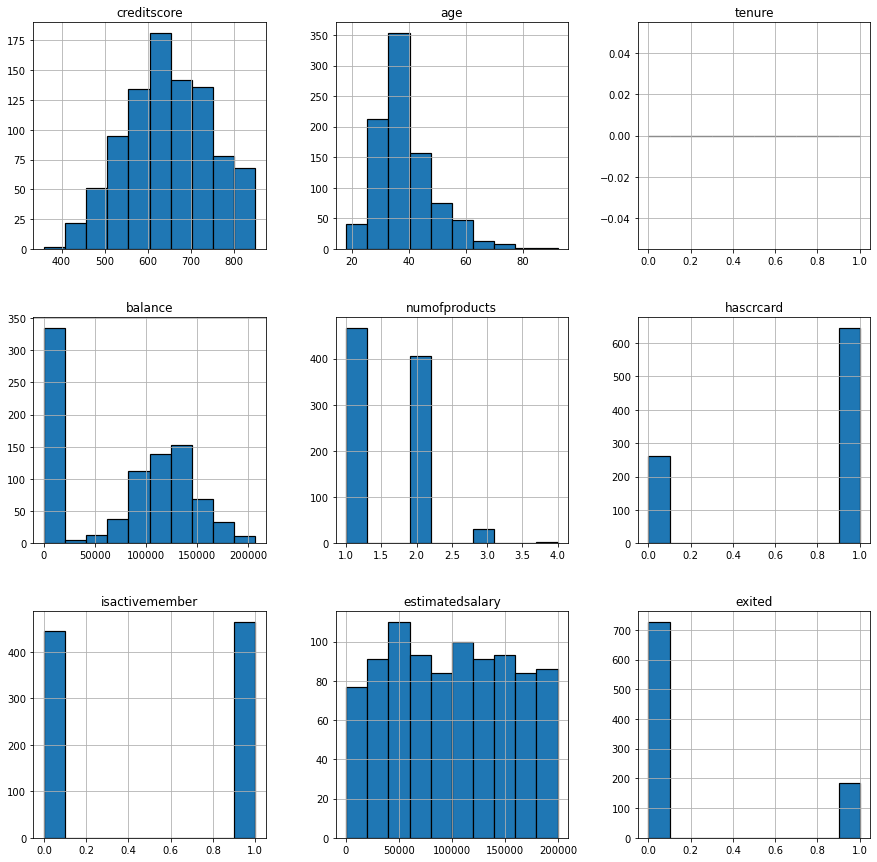

In [15]:
tenure_nan.hist(edgecolor='black', linewidth=1.2, figsize=(15,15))
plt.show()

After examining the relationship between the missing values in the **tenure** variable, we can say that is any connection between the missing values of the **tenure** variable to the other variables. 
As was mentioned above, due to the fact that the total percentage of the missing values in the **tenure** variable is less than 10%, we can safely remove them.

In [16]:
data.dropna(subset=['tenure'], inplace = True)

In [17]:
data.stb.missing(style = True)

,missing,total,percent
creditscore,0,"9,091",0.00%
geography,0,"9,091",0.00%
gender,0,"9,091",0.00%
age,0,"9,091",0.00%
tenure,0,"9,091",0.00%
balance,0,"9,091",0.00%
numofproducts,0,"9,091",0.00%
hascrcard,0,"9,091",0.00%
isactivemember,0,"9,091",0.00%
estimatedsalary,0,"9,091",0.00%


Great!

No missing values in the dataset.

Now let's check for duplicates.

**Duplicates**

In [18]:
data.duplicated().sum()

0

It's our lucky day! No duplicates:)

So up to this point, we lowercased our dataset took care of the missing values and made sure that there we no duplicated values.

Now let's do some investigation and perform Exploratory Data Analysis. 👩‍💻

**Exploratory Data Analysis**

Let's look at the distirubtions for each numeric variable in the dataset.

In [19]:
data_numeric = data[['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']]

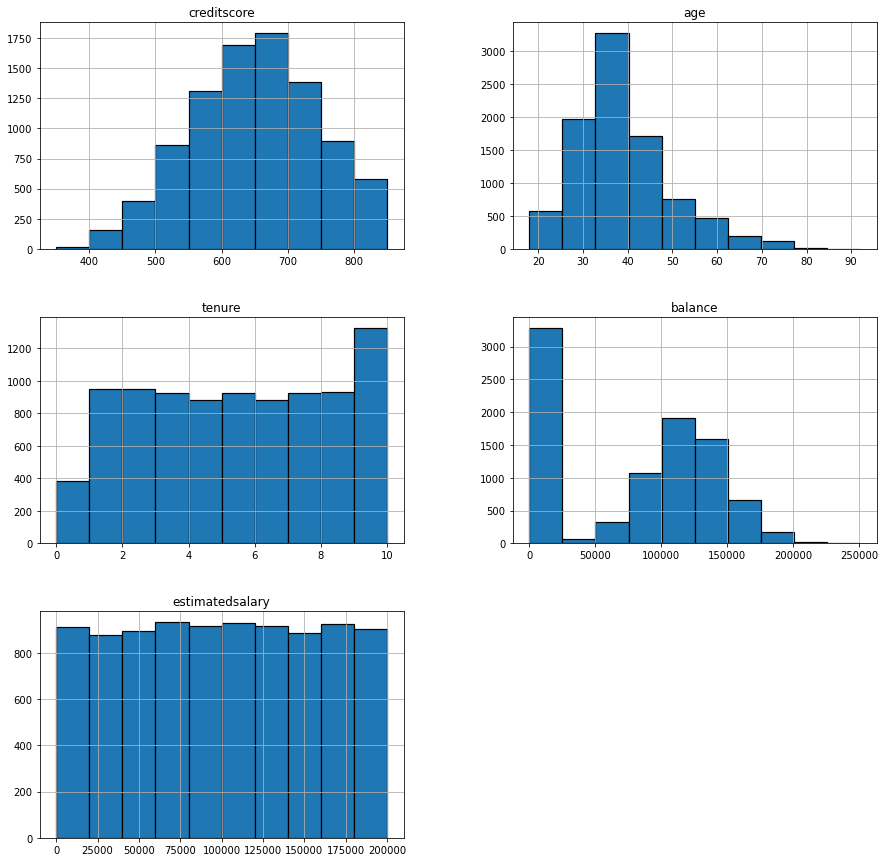

In [20]:
data_numeric.hist(edgecolor='black', linewidth=1.2, figsize=(15,15))
plt.show()

So here we see:
1. **credictscore** - has a relatively normal distribution. 
2. **age** - the age feature is a little bit skewed to the left.
3. **tenure** - the feature is pretty much balanced - almost all the years have the same amount of appearance.
4. **balance** - the balance feature is also has a relatively normal distribution, but with a lot of users with 0 money in their account - bummer :(
5. **estimatedsalary** - it's similar in some way to the **tenure** feature. Here also, the feature is balanced, and the bank has the same amount of customers for all sizes salaries.

Now let's explore each features separately with respect to the class it belongs to.

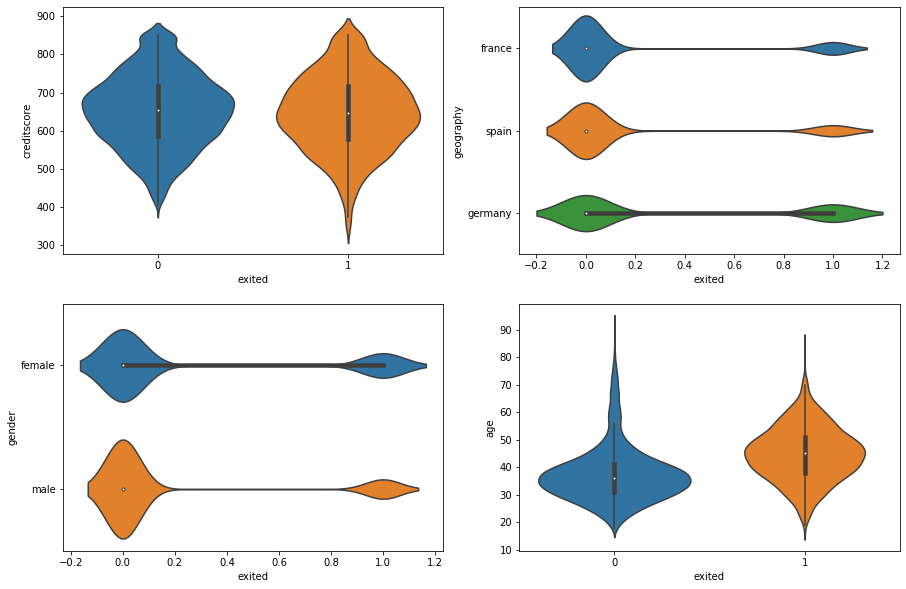

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='exited', y = 'creditscore', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='exited', y = 'geography', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='exited', y = 'gender', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='exited', y = 'age', data=data);

The violineplot show us that we cant tell that there are some features that influence more, thus are more important, than others on the target variable.
Let's investigate more features.

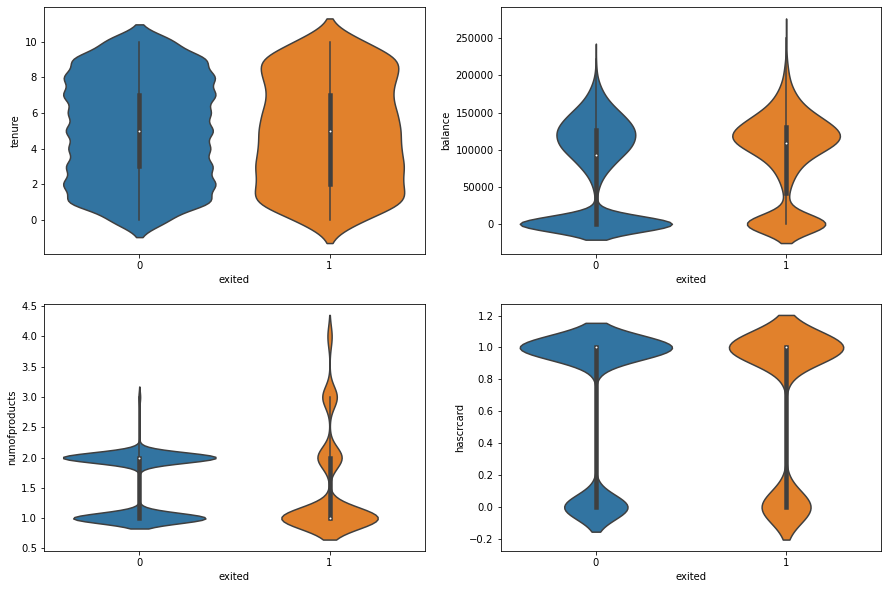

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='exited', y = 'tenure', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='exited', y = 'balance', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='exited', y = 'numofproducts', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='exited', y = 'hascrcard', data=data);

Here also, the violineplot shows us that all the features are the same in their influence level on the target variable. Maybe **numofproducts** has more influence. Let's check the remaining 2 features.

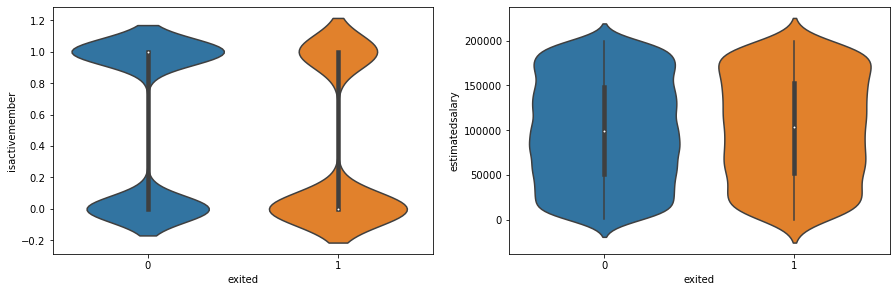

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='exited', y = 'isactivemember', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='exited', y = 'estimatedsalary', data=data)
plt.show()

The same story here, the features have the same influence on the target variable.

**Let's check how our features correlate with each other**

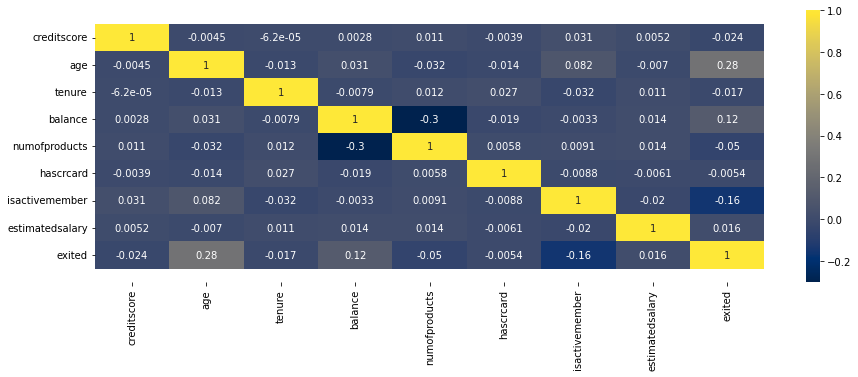

In [24]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(data.corr(), annot=True, cmap='cividis')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

We see above that almost all of the cells have a blue color and some cells in grey. By the legend on the right, that means that the correlation is very weak between the features. The outcomes match the results above from the violineplot, so it didn't surprise us.

Let's move on to the next step.🙌

### Step 2: Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings

Let's examine the balance of the classes in each feature. 

In [25]:
data.head(2)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0


**geography**

In [26]:
data.geography.value_counts()/len(data)

france     0.500495
germany    0.252227
spain      0.247278
Name: geography, dtype: float64

The geography feature has imbalanced data. It has 2 times more observations of  France than Germany or Spain. Although Germany and Spain are balanced - they have the same amount of observations. 

**gender**

In [27]:
data.gender.value_counts()/len(data)

male      0.547135
female    0.452865
Name: gender, dtype: float64

We have more males than females (a world with a smaller amount of women is a sad world!🤭), about 10% more. It's not a very large difference but also not a small one. 

**hascrcard**

In [28]:
data.hascrcard.value_counts()/len(data)

1    0.704983
0    0.295017
Name: hascrcard, dtype: float64

The data contains 2.3 more people with a credit card than customers without a credit card. It's a big difference and significant imbalance of the classes. 

**isactivemember**

In [29]:
data.isactivemember.value_counts()/len(data)

1    0.515565
0    0.484435
Name: isactivemember, dtype: float64

Yay!

At least one feature is balanced😄. The data set contains an almost equal amount of active and none active users.

**exited**

In [30]:
data.exited.value_counts()/len(data)

0    0.796062
1    0.203938
Name: exited, dtype: float64

The target column has a large imbalance. The data contains 4 times fewer customers that left the bank than customers who stayed in the bank - this is good! We still have faith, most of the customers stayed.

Technically we need to normalize the numeric features and make class weight adjustments. But we were asked not to, so let's continue!💪

**Encoding the object types features** 

In [31]:
one_hot = pd.get_dummies(data[['geography', 'gender']], drop_first=True)
data = data.join(one_hot).drop(['geography', 'gender'], axis=1)

In [32]:
data.head(10)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


Great!

Let's move on.

**Splitting the data**

We will divide the data into 3 datasets:
1. Training - 60% of the data
2. validation - 20% of the data
3. Test - 20% of the data

In [33]:
train_temp, test = train_test_split(data, test_size = 0.2, random_state = 12345, shuffle = True)
train, valid = train_test_split(train_temp, test_size = 0.25, random_state = 12345)

In [34]:
print('The size of the tarin set:{:.2%}'.format(len(train)/len(data)))
print('The size of the valid set:{:.2%}'.format(len(valid)/len(data)))
print('The size of the test set:{:.2%}'.format(len(test)/len(data)))

The size of the tarin set:59.99%
The size of the valid set:20.00%
The size of the test set:20.01%


Great!

Looking good!

Let's go build some models!

In [35]:
# Setting the features and target variables for the training set
train_features = train.drop('exited', axis = 1) 
train_target = train['exited']

# Setting the features and target variables for the validation set
valid_features = valid.drop('exited', axis = 1)
valid_target = valid['exited']

# Setting the features and target variables for the test set
test_features = test.drop('exited', axis = 1)
test_target = test['exited']

**Logistic Regression**

In [36]:
# Initializing the Logistic Regression algorithm
lr = LogisticRegression(random_state = 12345, solver = 'liblinear')

# Training the algorithm with the training data
lr.fit(train_features, train_target)

# Passing the test features to predict the outcome
valid_prediction = lr.predict(valid_features)

# Calculating the positive class probabilities
probabilities_valid = lr.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]

# Checking the F1 score of the algorithm
print('The F1 score of the Logistic Regression algorithm is: ',f1_score(valid_target, valid_prediction))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Logistic Regression algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid))

The F1 score of the Logistic Regression algorithm is:  0.021164021164021163
The AUC-ROC of the Logistic Regression algorithm is:  0.6610968101281067


**Decision Tree**

In [37]:
# Initializing the Logistic Regression algorithm
dec_tree = DecisionTreeClassifier(random_state = 12345)

# Training the algorithm with the training data
dec_tree.fit(train_features, train_target)

# Passing the test features to predict the outcome
valid_prediction = dec_tree.predict(valid_features)

# Calculating the positive class probabilities
probabilities_valid = dec_tree.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]

# Checking the F1 score of the algorithm
print('The F1 score of the Decision Tree algorithm is: ',f1_score(valid_target, valid_prediction))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Decision Tree algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid))

The F1 score of the Decision Tree algorithm is:  0.4952638700947226
The AUC-ROC of the Decision Tree algorithm is:  0.6845730027548209


**Random Forest**

In [38]:
# Initializing the Logistic Regression algorithm
forest = RandomForestClassifier(random_state = 12345)

# Training the algorithm with the training data
forest.fit(train_features, train_target)

# Passing the test features to predict the outcome
valid_prediction = forest.predict(valid_features)

# Calculating the positive class probabilities
probabilities_valid = forest.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]

# Checking the F1 score of the algorithm
print('The F1 score of the Random Forest algorithm is: ',f1_score(valid_target, valid_prediction))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Random Forest algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid))

The F1 score of the Random Forest algorithm is:  0.5507745266781411
The AUC-ROC of the Random Forest algorithm is:  0.8326229884538379


The Random Forest model has the best scores for the 2 metrics: 
* **F1** : 0.47
* **AUC-ROC**: 0.74

But it doesn't good enough. The F1 score doesn't get to at least 0.59. We have to improve the model's performance - let's do this! 🤘

### Step 3: Improve the quality of the model, taking into account the imbalance of classes. Train different models and find the best one. Briefly describe your findings.

**Standardization of the numeric features**

In [39]:
# Creating a list with all the numeric features
numeric = ['creditscore', 'balance', 'estimatedsalary']

# Intializing the scaler
scaler = StandardScaler()

# Tuning the scaler (calculating the mean and variance)
scaler.fit(train_features[numeric])

# Transforming the the training, validation and test sets 
train_features[numeric] = scaler.transform(train_features[numeric])
valid_features[numeric] = scaler.transform(valid_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])

In [40]:
train_features.head(2)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
3706,-0.203819,44,6.0,0.786022,2,0,0,-0.357205,0,1,0
6805,-0.357513,35,1.0,-1.230577,2,1,1,-1.671048,0,0,0


In [41]:
valid_features.head(2)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
4799,-1.003024,52,1.0,-1.230577,1,0,0,-0.626048,0,0,1
396,-0.941546,33,3.0,-0.354876,1,1,1,-1.722595,0,0,1


In [42]:
test_features.head(2)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
862,0.779816,41,7.0,0.600726,1,1,1,0.295405,0,0,1
9727,-1.218194,45,1.0,-1.230577,1,0,1,1.578362,0,0,0


Great!

Let's move on!

**Approach 1: Upsampling the target variable**

We have a significant imbalance here as we detected earlier. Let's take care of it.

In [43]:
# Building an upsample() fucntion 
def upsample (features, target):
    
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target==1]
    
    repeat = int(len(target_zero) / len(target_one) )
    
    features_upsampled = pd.concat([features_zero] + [features_one]*repeat)
    target_upsampled = pd.concat([target_zero] + [target_one]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

# Calling the function for the upsampling features and target
features_upsampled, target_upsampled = upsample(train_features, train_target)


Great!

Now let's build some models with the new data!

**Logistic Regression**

In [44]:
# Initializing the Logistic Regression algorithm
lr_upsam = LogisticRegression(random_state = 12345, solver = 'liblinear')

# Training the algorithm with the training data
lr_upsam.fit(features_upsampled, target_upsampled)

# Calculating the positive class probabilities
probabilities_valid_lg = lr_upsam.predict_proba(valid_features)
probabilities_one_valid_lg = probabilities_valid_lg[:, 1]


In [45]:
#Setting up a different threshold 
for i in np.arange(0, 0.5, 0.02):
    predicted_valid_lg = probabilities_one_valid_lg > i
    print('Threshold =',i, '|', 'f1_score =', f1_score(valid_target, predicted_valid_lg))
    print('--------------------------------------')

Threshold = 0.0 | f1_score = 0.3351648351648352
--------------------------------------
Threshold = 0.02 | f1_score = 0.3351648351648352
--------------------------------------
Threshold = 0.04 | f1_score = 0.3344021988089784
--------------------------------------
Threshold = 0.06 | f1_score = 0.3348666053357866
--------------------------------------
Threshold = 0.08 | f1_score = 0.33813283790060383
--------------------------------------
Threshold = 0.1 | f1_score = 0.3424528301886793
--------------------------------------
Threshold = 0.12 | f1_score = 0.34795180722891567
--------------------------------------
Threshold = 0.14 | f1_score = 0.3569292123629113
--------------------------------------
Threshold = 0.16 | f1_score = 0.36795865633074937
--------------------------------------
Threshold = 0.18 | f1_score = 0.3814655172413793
--------------------------------------
Threshold = 0.2 | f1_score = 0.39327731092436974
--------------------------------------
Threshold = 0.22 | f1_score = 0

The results show us that the best F1 score is when the threshold is equal to 0.44. (It still don't good enough for the threshold of F1_score = 0.59).

Let's print the final metrics values.

In [46]:
#Printing the F1 score of the algorithm
predicted_valid_lg = probabilities_one_valid_lg > 0.44
print('The F1 score of the Logistic Regression algorithm is: ',f1_score(valid_target, predicted_valid_lg))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Logistic Regression algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid_lg))

The F1 score of the Logistic Regression algorithm is:  0.49455984174085077
The AUC-ROC of the Logistic Regression algorithm is:  0.774648496891418


**Decision Tree**

In [47]:
# Initializing the Logistic Regression algorithm
dec_tree_upsam = DecisionTreeClassifier(random_state = 12345)

# Training the algorithm with the training data
dec_tree_upsam.fit(features_upsampled, target_upsampled)

# Calculating the positive class probabilities
probabilities_valid_tree = dec_tree_upsam.predict_proba(valid_features)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]


In [48]:
#Setting up a different threshold 
for i in np.arange(0, 0.5, 0.02):
    predicted_valid_tree = probabilities_one_valid_tree > i
    print('Threshold =',i, '|', 'f1_score =', f1_score(valid_target, predicted_valid_tree))
    print('--------------------------------------')

Threshold = 0.0 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.02 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.04 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.06 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.08 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.1 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.12 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.14 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.16 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.18 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.2 | f1_score = 0.4925170068027211
--------------------------------------
Threshold = 0.22 | f1_score = 0.492

The outcomes show us that the F1 score is the same no matter how we adjust the threshold. 

Let's print the final metrics values.

In [49]:
# Checking the F1 score of the algorithm
print('The F1 score of the Decision Tree algorithm is: ',f1_score(valid_target, predicted_valid_tree))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Decision Tree algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid_tree))

The F1 score of the Decision Tree algorithm is:  0.4925170068027211
The AUC-ROC of the Decision Tree algorithm is:  0.6825294675518223


**Random Forest**

In [50]:
# Initializing the Random Forest algorithm
forest_upsam = RandomForestClassifier(random_state = 12345, n_estimators=300)

# Training the algorithm with the training data
forest_upsam.fit(features_upsampled, target_upsampled)

# Calculating the positive class probabilities
probabilities_valid_forest = forest_upsam.predict_proba(valid_features)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

In [51]:
#Setting up a different threshold 
for i in np.arange(0, 0.5, 0.04):
    predicted_valid_forest = probabilities_one_valid_forest > i
    print('Threshold =',i, '|', 'f1_score =', f1_score(valid_target, predicted_valid_forest))
    print('--------------------------------------')

Threshold = 0.0 | f1_score = 0.33670653173873044
--------------------------------------
Threshold = 0.04 | f1_score = 0.38453276047261015
--------------------------------------
Threshold = 0.08 | f1_score = 0.42492211838006233
--------------------------------------
Threshold = 0.12 | f1_score = 0.46738351254480287
--------------------------------------
Threshold = 0.16 | f1_score = 0.5016233766233766
--------------------------------------
Threshold = 0.2 | f1_score = 0.5244122965641953
--------------------------------------
Threshold = 0.24 | f1_score = 0.5483234714003944
--------------------------------------
Threshold = 0.28 | f1_score = 0.5599999999999999
--------------------------------------
Threshold = 0.32 | f1_score = 0.5767878077373975
--------------------------------------
Threshold = 0.36 | f1_score = 0.587360594795539
--------------------------------------
Threshold = 0.4 | f1_score = 0.5941644562334217
--------------------------------------
Threshold = 0.44 | f1_score = 0.

So here we see that the best F1 score is when the threshold is set to be 0.44. 
Let's summarize and print the metrics.

In [52]:
#Printing the F1 score of the algorithm
predicted_valid_forest = probabilities_one_valid_forest > 0.44
print('The F1 score of the Random Forest algorithm is: ',f1_score(valid_target, predicted_valid_forest))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Random Forest algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid_forest))

The F1 score of the Random Forest algorithm is:  0.603399433427762
The AUC-ROC of the Random Forest algorithm is:  0.8352921916632796


The RandomForest algorithm is clearly the lead here, with the highest scores - it reached the threshold of F1 score=0.6!

Let's see how it performs with new data - the test set.

**Approach 2: Downsampling the target variable**

In [53]:
# Building an downsample() fucntion 
def downsample (features, target):
    
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target==1]
    
    fraction = len(target_one)/len(target_zero)
    
    features_downsampled = pd.concat([features_zero.sample(frac=fraction, random_state=12345)] + [features_one])
    target_downsampled = pd.concat([target_zero.sample(frac=fraction, random_state=12345)] + [target_one])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

# Calling the function for the downsampling features and target
features_downsampled, target_downsampled = downsample(train_features, train_target)

Great!

Now let's go build some models with the downsampled data. 

**Logistic Regression**

In [54]:
# Initializing the Logistic Regression algorithm
lr_downsam = LogisticRegression(random_state = 12345, solver = 'liblinear')

# Training the algorithm with the training data
lr_downsam.fit(features_downsampled, target_downsampled)

# Calculating the positive class probabilities
probabilities_valid_lg = lr_downsam.predict_proba(valid_features)
probabilities_one_valid_lg = probabilities_valid_lg[:, 1]

In [55]:
#Setting up a different threshold 
for i in np.arange(0, 0.6, 0.02):
    predicted_valid_lg = probabilities_one_valid_lg > i
    print('Threshold =',i, '|', 'f1_score =', f1_score(valid_target, predicted_valid_lg))
    print('--------------------------------------')

Threshold = 0.0 | f1_score = 0.3351648351648352
--------------------------------------
Threshold = 0.02 | f1_score = 0.3351648351648352
--------------------------------------
Threshold = 0.04 | f1_score = 0.3351648351648352
--------------------------------------
Threshold = 0.06 | f1_score = 0.33455545371219064
--------------------------------------
Threshold = 0.08 | f1_score = 0.33440514469453375
--------------------------------------
Threshold = 0.1 | f1_score = 0.3367252543940796
--------------------------------------
Threshold = 0.12 | f1_score = 0.33988764044943814
--------------------------------------
Threshold = 0.14 | f1_score = 0.34312796208530805
--------------------------------------
Threshold = 0.16 | f1_score = 0.34749034749034746
--------------------------------------
Threshold = 0.18 | f1_score = 0.3565737051792829
--------------------------------------
Threshold = 0.2 | f1_score = 0.3682310469314079
--------------------------------------
Threshold = 0.22 | f1_score = 

The output tells us that the best F1 score is when the threshold is set to be 0.54. 

Let's print the final metrics.

In [56]:
#Printing the F1 score of the algorithm
predicted_valid_lg = probabilities_one_valid_lg > 0.54
print('The F1 score of the Logistic Regression algorithm is: ',f1_score(valid_target, predicted_valid_lg))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Logistic Regression algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid_lg))

The F1 score of the Logistic Regression algorithm is:  0.501108647450111
The AUC-ROC of the Logistic Regression algorithm is:  0.7769385358804137


**Decision Tree**

In [57]:
# Initializing the Decision Tree algorithm
dec_tree_downsam = DecisionTreeClassifier(random_state = 12345)

# Training the algorithm with the training data
dec_tree_downsam.fit(features_downsampled, target_downsampled)

# Calculating the positive class probabilities
probabilities_valid_tree = dec_tree_downsam.predict_proba(valid_features)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

In [58]:
#Setting up a different threshold 
for i in np.arange(0, 0.5, 0.02):
    predicted_valid_tree = probabilities_one_valid_tree > i
    print('Threshold =',i, '|', 'f1_score =', f1_score(valid_target, predicted_valid_tree))
    print('--------------------------------------')

Threshold = 0.0 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.02 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.04 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.06 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.08 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.1 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.12 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.14 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.16 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.18 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.2 | f1_score = 0.4601113172541744
--------------------------------------
Threshold = 0.22 | f1_score = 0.460

The results are the same as with the upsampling method - for the Decision Tree model, no matter how we try to adjust the threshold to receive better results, the F1 score stays the same.

Let's print the final metrics.

In [59]:
# Checking the F1 score of the algorithm
print('The F1 score of the Decision Tree algorithm is: ',f1_score(valid_target, predicted_valid_tree))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Decision Tree algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid_tree))

The F1 score of the Decision Tree algorithm is:  0.4601113172541744
The AUC-ROC of the Decision Tree algorithm is:  0.6790181998825814


**Random Forest**

In [60]:
# Initializing the Random Forest algorithm
forest_downsam = RandomForestClassifier(random_state = 12345, n_estimators=300)

# Training the algorithm with the training data
forest_downsam.fit(features_downsampled, target_downsampled)

# Calculating the positive class probabilities
probabilities_valid_forest = forest_downsam.predict_proba(valid_features)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

In [61]:
#Setting up a different threshold 
for i in np.arange(0, 0.7, 0.02):
    predicted_valid_forest = probabilities_one_valid_forest > i
    print('Threshold =',i, '|', 'f1_score =', f1_score(valid_target, predicted_valid_forest))
    print('--------------------------------------')

Threshold = 0.0 | f1_score = 0.3351648351648352
--------------------------------------
Threshold = 0.02 | f1_score = 0.3363970588235294
--------------------------------------
Threshold = 0.04 | f1_score = 0.3430178069353327
--------------------------------------
Threshold = 0.06 | f1_score = 0.352431391429947
--------------------------------------
Threshold = 0.08 | f1_score = 0.3602977667493797
--------------------------------------
Threshold = 0.1 | f1_score = 0.3709016393442623
--------------------------------------
Threshold = 0.12 | f1_score = 0.3801478352692714
--------------------------------------
Threshold = 0.14 | f1_score = 0.3880434782608696
--------------------------------------
Threshold = 0.16 | f1_score = 0.3984243106359032
--------------------------------------
Threshold = 0.18 | f1_score = 0.40674026728646134
--------------------------------------
Threshold = 0.2 | f1_score = 0.4167164179104478
--------------------------------------
Threshold = 0.22 | f1_score = 0.427

We can see in the output that the model get the best F1 score when the threshold is set to 0.64.

Let's print the final metrics.

In [62]:
#Printing the F1 score of the algorithm
predicted_valid_forest = probabilities_one_valid_forest > 0.64
print('The F1 score of the Random Forest algorithm is: ',f1_score(valid_target, predicted_valid_forest))

# Checking the AUC-ROC of the algorithm
print('The AUC-ROC of the Random Forest algorithm is: ',roc_auc_score(valid_target, probabilities_one_valid_forest))

The F1 score of the Random Forest algorithm is:  0.5967976710334789
The AUC-ROC of the Random Forest algorithm is:  0.8405779102500414


As it was in the first approach, the Random Forest is the algorithm that has the best performance in the downsampling approach. It has been reached the F1 score of 0.59 - yay! (Although in the first approach of the upsampling method, the random tree got a higher F1 score - 0.6).

Now let's go test it on the test set to see which of the approaches is the best. 

### Step 4: Perform the final testing

In [63]:
# Testing the upsampled Forest model
probabilities_test = forest_upsam.predict_proba(test_features)
probabilities_one_test_forest = probabilities_test[:, 1]

predicted_test_forest = probabilities_one_test_forest > 0.44

print('The F1 score of the Random Forest algorithm with the upsampled data is: ',f1_score(test_target, predicted_test_forest))
print('The AUC-ROC of the Random Forest algorithm with the upsampled data is: ',roc_auc_score(test_target, probabilities_one_test_forest))

The F1 score of the Random Forest algorithm with the upsampled data is:  0.5936199722607489
The AUC-ROC of the Random Forest algorithm with the upsampled data is:  0.854088402952995


In [64]:
# Testing the downsampled Forest model
probabilities_test = forest_downsam.predict_proba(test_features)
probabilities_one_test_forest = probabilities_test[:, 1]

predicted_test_forest = probabilities_one_test_forest > 0.64

print('The F1 score of the Random Forest algorithm with the downsampled data is: ',f1_score(test_target, predicted_test_forest))
print('The AUC-ROC of the Random Forest algorithm downsampled data is: ',roc_auc_score(test_target, probabilities_one_test_forest))

The F1 score of the Random Forest algorithm with the downsampled data is:  0.5777777777777777
The AUC-ROC of the Random Forest algorithm downsampled data is:  0.8492580132697879


The model performs better with the upsampled data - the model has reached F1 score of 0.59 with the test dataset, compared with the downsampled data. Although the AUC-ROC metric is almost the same for both of the datasets - around 0.85 (the maximum score is 1) - which means that the quality of the model is good. 

Biana.